In [24]:
from rdkit import Chem
from rdkit.Chem import AllChem as Chem

In [7]:
#disable warnings
from rdkit import RDLogger

lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [2]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')

# cubane

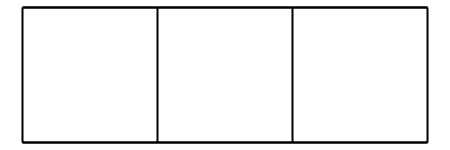

In [3]:
cubane = 'C12C3C4C1C5C2C3C45'
cubane = Chem.MolFromSmiles(cubane)
cubane

In [4]:
sssr_cubane = Chem.GetSSSR(cubane)
len(sssr_cubane)

5

In [5]:
ring_info = cubane.GetRingInfo()
ring_info.NumRings()

5

# drugbank

In [8]:
data = [mol for mol in suppl if mol]

In [14]:
data

 ...]

In [9]:
None in data

False

In [10]:
ring_info = [len(Chem.GetSSSR(mol)) for mol in data]

In [11]:
sum(ring_info)/len(ring_info) # avg number of rings in molecules in drugbank

2.451123595505618

In [21]:
from rdkit.Chem import Descriptors
mw_list = [Descriptors.MolWt(mol) for mol in data]

In [22]:
avg_mw = sum(mw_list)/len(mw_list)

In [23]:
avg_mw

356.7674954541493

In [25]:
# check how many cmpds are within lipinski rule of 5
# conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]

In [41]:
def check_rule_of_five(mol):
    MW = Descriptors.MolWt(mol)
    HBA = Descriptors.NumHAcceptors(mol)
    HBD = Descriptors.NumHDonors(mol)
    LogP = Descriptors.MolLogP(mol)
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    if conditions.count(True)  >= 3:
        return True
    else:
        return False

In [42]:
# check how many cmpds are within Lipinski rule, with a room for one condition not being met
sum_lipinski = sum([check_rule_of_five(mol) for mol in data])
sum_lipinski

6379

In [43]:
# what % of ds that is
sum_lipinski/len(data)

0.8959269662921349

In [48]:
# how many cmpds are within rule of 3 for lead-likeness?
from rdkit.Chem import rdMolDescriptors
def check_lead_likeness(mol):
    MW = Descriptors.MolWt(mol)
    HBA = Descriptors.NumHAcceptors(mol)
    HBD = Descriptors.NumHDonors(mol)
    LogP = Descriptors.MolLogP(mol)
    Rot = rdMolDescriptors.CalcNumRotatableBonds(mol)
    conditions = [MW <= 300, HBA <= 3, HBD <= 3, LogP <= 3, Rot <= 3]
    if conditions.count(True)  >= 5:
        return True
    else:
        return False

In [49]:
sum_lead_likeness = sum([check_lead_likeness(mol) for mol in data])
sum_lead_likeness

1037

In [50]:
sum_lead_likeness/len(data)

0.14564606741573033